In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tqdm import tqdm

In [107]:
data = pd.read_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/train.csv")

num_stocks = data["stock_id"].nunique()
num_dates = data["date_id"].nunique()
num_updates = data["seconds_in_bucket"].nunique()

print(f"# stocks         : {num_stocks}")
print(f"# dates          : {num_dates}")
print(f"# updates per day: {num_updates}")

stock_returns = np.zeros((num_stocks, num_dates, num_updates))
index_returns = np.zeros((num_stocks, num_dates, num_updates))

for (stock_id, date_id), frame in tqdm(data.groupby(["stock_id", "date_id"])):
    frame["stock_return"] = ((frame["wap"] / frame["wap"].shift(6)).shift(-6) - 1) * 10_000
    frame["index_return"] = frame["stock_return"] - frame["target"]

    stock_returns[stock_id, date_id] = frame["stock_return"].values
    index_returns[stock_id, date_id] = frame["index_return"].values

index_return = np.mean(index_returns, axis=0)

lr = LinearRegression()
y = index_return.reshape(-1)
X = stock_returns.reshape((num_stocks, -1)).T

mask = ~((np.isnan(y) | np.isnan(X).any(axis=1)))
X, y = X[mask], y[mask]

lr.fit(X, y)

print(" Fit ".center(80, ">"))
print("Coef:", lr.coef_)
print("Intercept:", lr.intercept_)
print("R2:", r2_score(y, lr.predict(X)))

lr.coef_ = lr.coef_.round(3)
lr.intercept_ = 0.0
print(" Round with 3 digits ".center(80, ">"))
print("Coef:", lr.coef_)
print("Sum of Coef:", lr.coef_.sum())
print("R2:", r2_score(y, lr.predict(X)))

# stocks         : 200
# dates          : 481
# updates per day: 55


100%|██████████| 95236/95236 [00:29<00:00, 3225.15it/s]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Fit >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Coef: [0.004      0.00099987 0.00200041 0.00599891 0.00400068 0.00399949
 0.00200014 0.0059992  0.00600029 0.00200012 0.00200072 0.00800012
 0.00600039 0.00200007 0.0080014  0.00600051 0.00199993 0.0059999
 0.00400013 0.00199974 0.00399933 0.00099993 0.00599955 0.00399971
 0.00199876 0.00200008 0.00400097 0.0020008  0.00400021 0.00400005
 0.00100001 0.00100016 0.00199924 0.00199993 0.00599995 0.00399917
 0.00400017 0.00399906 0.00599977 0.00200015 0.0020007  0.03999955
 0.0020001  0.00199981 0.00399968 0.03999983 0.00200033 0.00099959
 0.00600002 0.00399944 0.00399979 0.00600017 0.00099921 0.00399993
 0.00399936 0.0019985  0.00599995 0.00400028 0.00599981 0.00400045
 0.00600029 0.00399988 0.00200012 0.00100003 0.00200041 0.00400043
 0.00200011 0.00799989 0.00400056 0.00400011 0.00199956 0.00399921
 0.00599994 0.00199992 0.00399979 0.00400047 0.00200035 0.00399996
 0.00400003 0.00399989 0.00100029 0.0019999

## Verify Results for Weights

In [3]:
weights = [0.004      ,0.00099987 ,0.00200041 ,0.00599891 ,0.00400068 ,0.00399949
 ,0.00200014 ,0.0059992  ,0.00600029 ,0.00200012 ,0.00200072 ,0.00800012
 ,0.00600039 ,0.00200007 ,0.0080014  ,0.00600051 ,0.00199993 ,0.0059999
 ,0.00400013 ,0.00199974 ,0.00399933 ,0.00099993 ,0.00599955 ,0.00399971
 ,0.00199876 ,0.00200008 ,0.00400097 ,0.0020008  ,0.00400021 ,0.00400005
 ,0.00100001 ,0.00100016 ,0.00199924 ,0.00199993 ,0.00599995 ,0.00399917
 ,0.00400017 ,0.00399906 ,0.00599977 ,0.00200015 ,0.0020007  ,0.03999955
 ,0.0020001  ,0.00199981 ,0.00399968 ,0.03999983 ,0.00200033 ,0.00099959
 ,0.00600002 ,0.00399944 ,0.00399979 ,0.00600017 ,0.00099921 ,0.00399993
 ,0.00399936 ,0.0019985  ,0.00599995 ,0.00400028 ,0.00599981 ,0.00400045
 ,0.00600029 ,0.00399988 ,0.00200012 ,0.00100003 ,0.00200041 ,0.00400043
 ,0.00200011 ,0.00799989 ,0.00400056 ,0.00400011 ,0.00199956 ,0.00399921
 ,0.00599994 ,0.00199992 ,0.00399979 ,0.00400047 ,0.00200035 ,0.00399996
 ,0.00400003 ,0.00399989 ,0.00100029 ,0.00199997 ,0.00200019 ,0.00799969
 ,0.02000066 ,0.00400029 ,0.00600019 ,0.00200024 ,0.02       ,0.00199965
 ,0.00199968 ,0.00599962 ,0.00399987 ,0.00199997 ,0.00099953 ,0.02000033
 ,0.00600029 ,0.00099946 ,0.00200062 ,0.00399946 ,0.00100021 ,0.00199986
 ,0.00600047 ,0.00600071 ,0.00399889 ,0.00600028 ,0.0010003  ,0.00199986
 ,0.00400008 ,0.00600071 ,0.00600016 ,0.00100013 ,0.04000011 ,0.00599947
 ,0.00200012 ,0.00400061 ,0.00199956 ,0.00199961 ,0.00599985 ,0.00200055
 ,0.00200083 ,0.00399993 ,0.00599961 ,0.00600028 ,0.00200005 ,0.00199999
 ,0.0080003  ,0.00600021 ,0.00400044 ,0.00199994 ,0.00599988 ,0.00200002
 ,0.00399908 ,0.00600099 ,0.00200021 ,0.00399981 ,0.00100042 ,0.00399994
 ,0.00199993 ,0.0039995  ,0.00800063 ,0.00600055 ,0.00799953 ,0.00200005
 ,0.00400064 ,0.00199988 ,0.00099981 ,0.00399912 ,0.00399992 ,0.00399974
 ,0.00599995 ,0.00800022 ,0.00400055 ,0.00099968 ,0.00099956 ,0.00200017
 ,0.00599973 ,0.00400059 ,0.00100004 ,0.00199961 ,0.00599971 ,0.00400006
 ,0.00599987 ,0.00800007 ,0.00200054 ,0.00200102 ,0.00400114 ,0.00199923
 ,0.0399987  ,0.00199969 ,0.00199982 ,0.00399976 ,0.00199995 ,0.00200001
 ,0.00599982 ,0.02000055 ,0.0039996  ,0.00200022 ,0.00600002 ,0.01999984
 ,0.00100015 ,0.00200021 ,0.0059996  ,0.00400055 ,0.00599988 ,0.00400022
 ,0.00399931 ,0.0040002  ,0.0039998  ,0.002      ,0.00399975 ,0.04000041
 ,0.00200037 ,0.00799998 ,0.00199977 ,0.00400093 ,0.00099996 ,0.00400022
 ,0.00599947 ,0.00400014]

print(len(weights))

weights_df = pd.DataFrame({'stock_id': range(len(weights)), 'weight': weights})
weights_df

200


,stock_id,weight
0,0,0.004000
1,1,0.001000
2,2,0.002000
3,3,0.005999
4,4,0.004001
...,...,...
195,195,0.004001
196,196,0.001000
197,197,0.004000
198,198,0.005999


In [84]:
data = pd.read_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/train.csv")

unique_stocks = data['stock_id'].nunique()
if len(weights) != unique_stocks:
    raise ValueError("The number of weights must match the number of unique stocks.")

# Create a new column for weighted WAP
data = pd.merge(data, weights_df, on='stock_id', how='left')
data['weighted_wap'] = data.apply(lambda row: row['wap'] * weights[int(row['stock_id'])], axis=1)

# Group by time_id and sum the weighted WAPs, excluding rows where seconds_in_bucket is 540
index_by_time = data.groupby('time_id')['weighted_wap'].sum().reset_index()
index_by_time.rename(columns={'weighted_wap': 'index'}, inplace=True)

index_by_time

,time_id,index
0,0,0.961000
1,1,0.961342
2,2,0.961504
3,3,0.961526
4,4,0.961610
...,...,...
26450,26450,0.998855
26451,26451,0.998894
26452,26452,0.998812
26453,26453,0.998808


In [95]:
merged_data = pd.merge(data, index_by_time, on='time_id', how='left')
shifted_wap = merged_data[['stock_id', 'seconds_in_bucket', 'time_id', 'wap', 'index']].copy()
shifted_wap = shifted_wap[shifted_wap['seconds_in_bucket'] >= 60]
shifted_wap['time_id'] = shifted_wap['time_id'] - 6  # Shift time_id by 6
shifted_wap.rename(columns={'wap': 'next_wap'}, inplace=True)
shifted_wap.rename(columns={'index': 'next_index'}, inplace=True)
shifted_wap = shifted_wap[['stock_id', 'time_id', 'next_wap', 'next_index']]
merged_data = pd.merge(merged_data, shifted_wap, on=['stock_id', 'time_id'], how='left')

# Shift the 'wap' and 'index' columns to align each time_id with the next
merged_data['predicted_target'] = ((merged_data['next_wap'] / merged_data['wap']) - (merged_data['next_index'] / merged_data['index'])) * 10000

In [96]:
merged_data['margin_of_error'] = merged_data['predicted_target'] -  merged_data['target']
merged_data['margin_of_error_pc'] = merged_data['margin_of_error'] / merged_data['target']
merged_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,time_id,row_id,weight,weighted_wap,index,next_wap,next_index,predicted_target,margin_of_error,margin_of_error_pc
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,...,0,0_0_0,0.004000,0.004000,0.961000,1.000517,0.961784,-2.983588,0.046116,-0.015221
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,...,0,0_0_1,0.001000,0.001000,0.961000,1.000268,0.961784,-5.473588,0.046398,-0.008405
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,...,0,0_0_2,0.002000,0.002000,0.961000,0.999981,0.961784,-8.343588,0.046362,-0.005526
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,...,0,0_0_3,0.005999,0.005999,0.961000,1.000419,0.961784,-3.963588,0.046613,-0.011623
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,...,0,0_0_4,0.004001,0.004001,0.961000,1.000086,0.961784,-7.293588,0.056261,-0.007655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,...,26454,480_540_195,0.004001,0.004002,0.998756,NaN,NaN,NaN,NaN,NaN
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,...,26454,480_540_196,0.001000,0.001001,0.998756,NaN,NaN,NaN,NaN,NaN
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,...,26454,480_540_197,0.004000,0.003983,0.998756,NaN,NaN,NaN,NaN,NaN
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,...,26454,480_540_198,0.005999,0.005994,0.998756,NaN,NaN,NaN,NaN,NaN


In [97]:
filtered_data = merged_data[["stock_id", "date_id", "seconds_in_bucket", "wap", "target", "time_id", "row_id", "weight", "weighted_wap", "index", "next_wap", "next_index"]]
filtered_data.to_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/simplified_train_with_index.csv", index=False)

In [98]:
filtered_data = filtered_data[filtered_data["date_id"] > 450] 
filtered_data = filtered_data[filtered_data['seconds_in_bucket'] <= 480]

In [99]:
filtered_data

,stock_id,date_id,seconds_in_bucket,wap,target,time_id,row_id,weight,weighted_wap,index,next_wap,next_index
4907980,0,451,0,1.000000,12.749434,24805,451_0_0,0.004000,0.004000,1.000000,1.001521,1.000246
4907981,1,451,0,1.000000,-0.090003,24805,451_0_1,0.001000,0.001000,1.000000,1.000238,1.000246
4907982,2,451,0,1.000000,5.480051,24805,451_0_2,0.002000,0.002000,1.000000,1.000795,1.000246
4907983,3,451,0,1.000000,-3.870130,24805,451_0_3,0.005999,0.005999,1.000000,0.999860,1.000246
4907984,4,451,0,1.000000,2.980232,24805,451_0_4,0.004001,0.004001,1.000000,1.000545,1.000246
...,...,...,...,...,...,...,...,...,...,...,...,...
5236775,195,480,480,1.000579,-1.389980,26448,480_480_195,0.004001,0.004003,0.998868,1.000328,0.998756
5236776,196,480,480,1.000800,1.319647,26448,480_480_196,0.001000,0.001001,0.998868,1.000819,0.998756
5236777,197,480,480,0.996233,-3.259778,26448,480_480_197,0.004000,0.003985,0.998868,0.995797,0.998756
5236778,198,480,480,0.999322,-2.020001,26448,480_480_198,0.005999,0.005995,0.998868,0.999008,0.998756


In [89]:
count_unique_stock_ids_per_time = filtered_data.groupby('time_id')['stock_id'].nunique()
any_count_not_200 = not all(count_unique_stock_ids_per_time == 200)

any_count_not_200

False

In [100]:
filtered_data.to_csv("/Users/lucasgoh/Library/CloudStorage/GoogleDrive-zwg210@nyu.edu/My Drive/2-Semesters-based Folders/0-Fall 2023/15-072_Analytics-Edge/edge-project-2023/1-data/simplified_train_with_index_for_Zeki_231201_before480.csv", index=False)

In [90]:
pd.set_option('display.max_columns', None) 
merged_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,weighted_wap,index,next_wap,next_index,predicted_target,margin_of_error,margin_of_error_pc
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0,0.004000,0.961,1.000517,0.961784,-2.983588,0.046116,-0.015221
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1,0.001000,0.961,1.000268,0.961784,-5.473588,0.046398,-0.008405
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2,0.002000,0.961,0.999981,0.961784,-8.343588,0.046362,-0.005526
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3,0.005999,0.961,1.000419,0.961784,-3.963588,0.046613,-0.011623
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4,0.004001,0.961,1.000086,0.961784,-7.293588,0.056261,-0.007655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195,0.004002,NaN,NaN,NaN,NaN,NaN,NaN
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196,0.001001,NaN,NaN,NaN,NaN,NaN,NaN
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197,0.003983,NaN,NaN,NaN,NaN,NaN,NaN
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198,0.005994,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_merged_data = merged_data["stock_id", "date_id", "wap", "target", "time_id", "row_id", "weighted_wap", "index", ]

/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_39000/1519294236.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data['margin_of_error'], fit=stats.norm, kde=True)


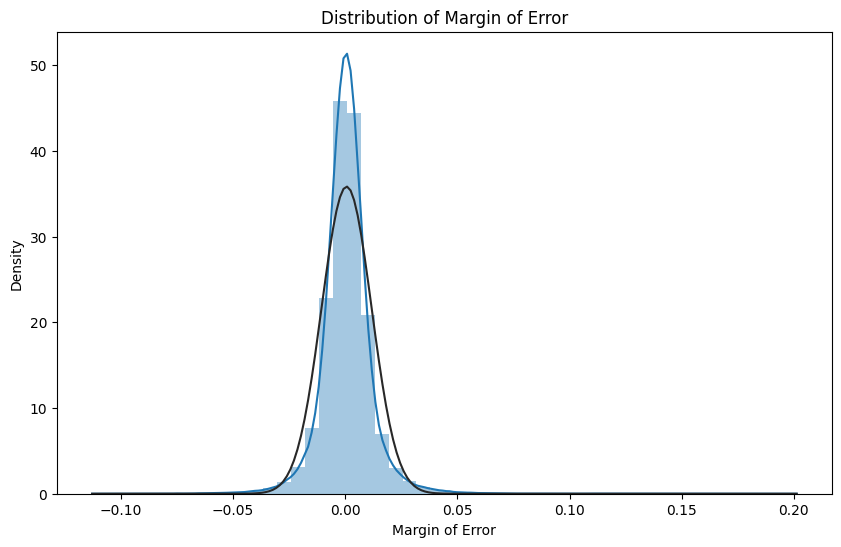

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'merged_data' is your DataFrame and it has a column named 'margin_of_error_pc'
plt.figure(figsize=(10, 6))

# Plot the distribution with a kernel density estimate to visualize it as a normal distribution
sns.distplot(merged_data['margin_of_error'], fit=stats.norm, kde=True)

# Add labels and title
plt.title('Distribution of Margin of Error')
plt.xlabel('Margin of Error')
plt.ylabel('Density')

# Show the plot
plt.show()

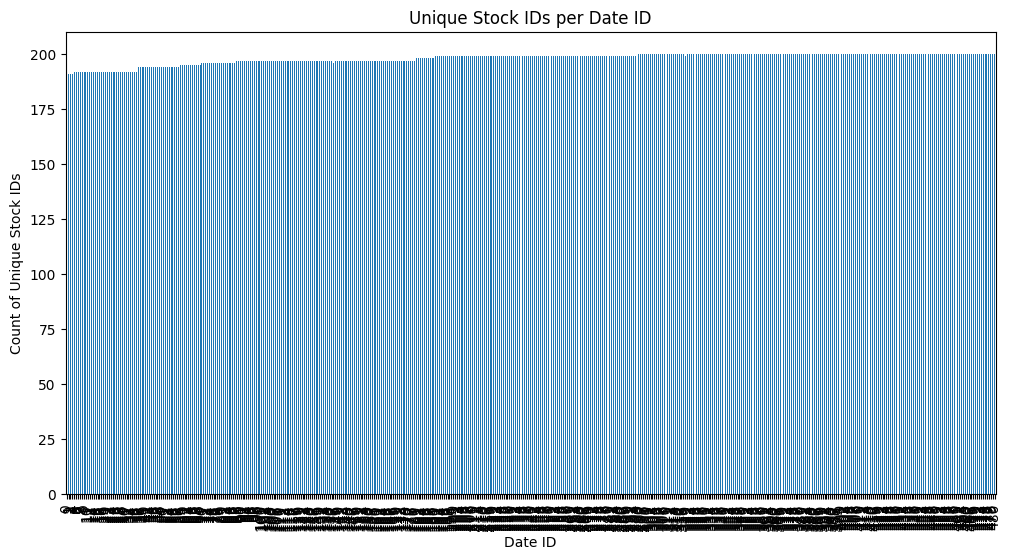

In [94]:
import matplotlib.pyplot as plt
unique_stock_counts = merged_data.groupby('date_id')['stock_id'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
unique_stock_counts.plot(kind='bar')

# Setting the plot title and labels
plt.title('Unique Stock IDs per Date ID')
plt.xlabel('Date ID')
plt.ylabel('Count of Unique Stock IDs')

# Show the plot
plt.show()

## Comment: Discrepancy due to missing stocks in the beginnning dates

In [65]:
# Verify difference in plot
pd.set_option('display.max_rows', None) 
display(merged_data.iloc[170:200])
pd.set_option('display.max_rows', 50)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,target,time_id,row_id,weighted_wap,index,next_wap,next_index,predicted_target,margin_of_error,margin_of_error_pc
170,178,0,0,8.287483e+06,1,0.999313,1.094875e+07,NaN,NaN,0.999101,...,8.699894,0,0_0_178,0.006000,0.961000,1.001690,0.961784,8.746412,0.046518,0.005347
171,179,0,0,3.030581e+06,1,0.999987,9.940312e+07,NaN,NaN,0.999645,...,-11.469722,0,0_0_179,0.020000,0.961000,0.999674,0.961784,-11.413588,0.056134,-0.004894
172,180,0,0,1.158538e+06,1,0.999939,1.772703e+06,NaN,NaN,0.998429,...,0.369549,0,0_0_180,0.001000,0.961000,1.000857,0.961784,0.416412,0.046863,0.126812
173,181,0,0,5.744260e+05,-1,0.999960,1.906202e+06,NaN,NaN,0.999304,...,0.289679,0,0_0_181,0.002000,0.961000,1.000850,0.961784,0.346412,0.056733,0.195850
174,182,0,0,1.603181e+06,-1,1.000081,1.322455e+06,NaN,NaN,0.999864,...,14.599562,0,0_0_182,0.006000,0.961000,1.002281,0.961784,14.656412,0.056850,0.003894
175,183,0,0,2.819827e+06,-1,1.000269,2.047320e+07,NaN,NaN,0.999993,...,-4.379749,0,0_0_183,0.004001,0.961000,1.000382,0.961784,-4.333588,0.046161,-0.010540
176,184,0,0,8.396832e+05,-1,1.000358,2.041480e+06,NaN,NaN,0.999821,...,-4.739761,0,0_0_184,0.006000,0.961000,1.000347,0.961784,-4.683588,0.056173,-0.011852
177,185,0,0,1.742409e+06,-1,1.000925,2.687281e+06,NaN,NaN,0.998640,...,3.010035,0,0_0_185,0.004000,0.961000,1.001122,0.961784,3.066412,0.056377,0.018730
178,186,0,0,1.161877e+07,1,0.999567,8.813736e+06,NaN,NaN,0.999974,...,-3.679991,0,0_0_186,0.003999,0.961000,1.000453,0.961784,-3.623588,0.056403,-0.015327
179,187,0,0,1.209646e+07,-1,1.000777,7.414673e+06,NaN,NaN,0.999942,...,6.380081,0,0_0_187,0.004000,0.961000,1.001458,0.961784,6.426412,0.046331,0.007262


In [74]:
merged_data_2 = merged_data[merged_data['date_id'] > 450]
merged_data_2

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,target,time_id,row_id,weighted_wap,index,next_wap,next_index,predicted_target,margin_of_error,margin_of_error_pc
4907980,0,451,0,1.016637e+08,-1,1.001570,27901114.55,NaN,NaN,0.999892,...,12.749434,24805,451_0_0,0.004000,1.0,1.001521,1.000246,12.744022,-0.005412,-0.000424
4907981,1,451,0,1.481195e+06,1,0.999733,2922825.96,NaN,NaN,0.999782,...,-0.090003,24805,451_0_1,0.001000,1.0,1.000238,1.000246,-0.085978,0.004025,-0.044717
4907982,2,451,0,0.000000e+00,0,0.999531,7211807.46,NaN,NaN,0.999480,...,5.480051,24805,451_0_2,0.002000,1.0,1.000795,1.000246,5.484022,0.003971,0.000725
4907983,3,451,0,5.426093e+06,-1,1.000054,52742546.23,NaN,NaN,0.999902,...,-3.870130,24805,451_0_3,0.005999,1.0,0.999860,1.000246,-3.865978,0.004151,-0.001073
4907984,4,451,0,6.102518e+06,-1,1.000013,10336604.95,NaN,NaN,0.998472,...,2.980232,24805,451_0_4,0.004001,1.0,1.000545,1.000246,2.984022,0.003789,0.001272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2.440723e+06,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,...,2.310276,26454,480_540_195,0.004002,NaN,NaN,NaN,NaN,NaN,NaN
5237976,196,480,540,3.495105e+05,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,...,-8.220077,26454,480_540_196,0.001001,NaN,NaN,NaN,NaN,NaN,NaN
5237977,197,480,540,0.000000e+00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,...,1.169443,26454,480_540_197,0.003983,NaN,NaN,NaN,NaN,NaN,NaN
5237978,198,480,540,1.000899e+06,1,0.999210,94773271.05,0.999210,0.999210,0.998970,...,-1.540184,26454,480_540_198,0.005994,NaN,NaN,NaN,NaN,NaN,NaN


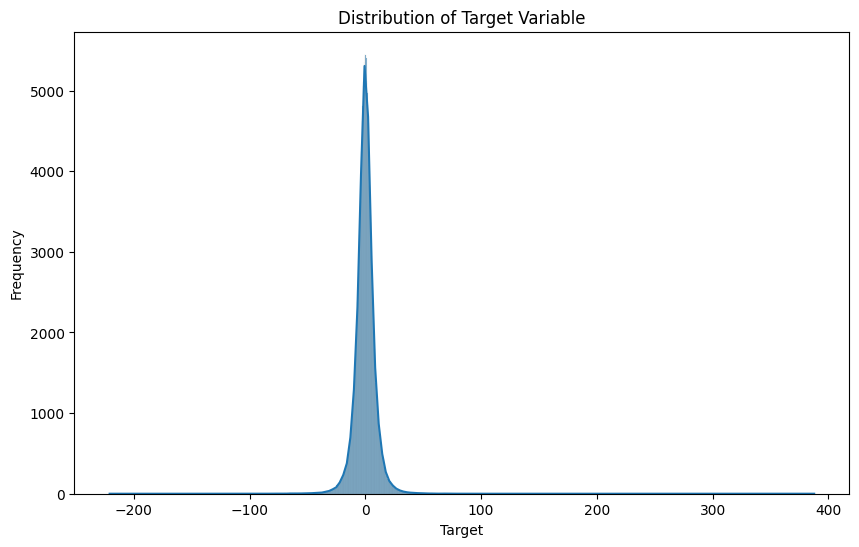

In [76]:
plt.figure(figsize=(10, 6))

# Create a histogram combined with a kernel density estimate plot
sns.histplot(merged_data_2['target'], kde=True)

# Adding title and labels
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

/var/folders/gp/7f5d9bz54rgg8x8hbqxjrr2h0000gn/T/ipykernel_75731/3708241327.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['margin_of_error'], fit=stats.norm, kde=True)


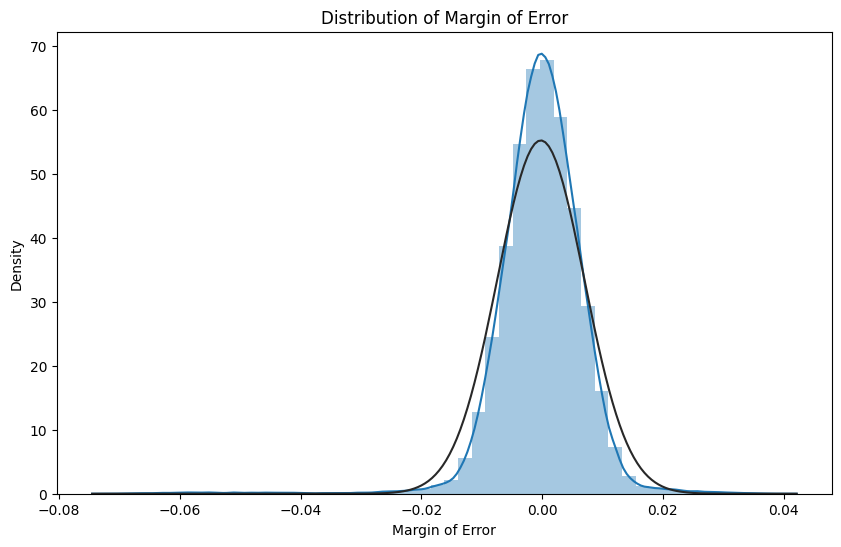

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Filter out infinite values from 'margin_of_error' column
filtered_data = merged_data_2[~np.isinf(merged_data_2['margin_of_error'])]
# Assuming 'merged_data' is your DataFrame and it has a column named 'margin_of_error_pc'
plt.figure(figsize=(10, 6))

# Plot the distribution with a kernel density estimate to visualize it as a normal distribution
sns.distplot(filtered_data['margin_of_error'], fit=stats.norm, kde=True)

# Add labels and title
plt.title('Distribution of Margin of Error')
plt.xlabel('Margin of Error')
plt.ylabel('Density')

# Show the plot
plt.show()